# Clustering for two features begins

In [1]:
import pandas as pd

import  numpy as np

import  matplotlib.pyplot as plt

import seaborn as sbn

from sklearn.preprocessing import  StandardScaler

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

### Importing the dataset

In [2]:
data = pd.read_csv("wheatseeds (1).csv")
data

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


### Exploring the dataset

In [3]:
data.shape

(199, 8)

In [4]:
data.size

1592

In [5]:
data.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

In [6]:
type(data
     )

pandas.core.frame.DataFrame

In [7]:
data.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [8]:
data.columns

Index(['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove', 'Type'],
      dtype='object')

### Dropping the type columns

In [9]:
data = data.drop('Type', axis=1)
data

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [10]:
data.shape

(199, 7)

In [11]:
data.columns

Index(['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove'],
      dtype='object')

In [12]:
data = data.rename(columns={
    'Area': 'Area',
    'Perimeter': 'Perimeter',
    'Compactness': 'Compactness',
    'Kernel.Length': 'K_length',
    'Kernel.Width': 'K_width',

    'Asymmetry.Coeff':'A_coeff',
      'Kernel.Groove': 'K_groove'
})

### Feature Selection

In [13]:
x = data[['Area',  'K_length']]

In [14]:
x

,Area,K_length
0,15.26,5.763
1,14.88,5.554
2,14.29,5.291
3,13.84,5.324
4,16.14,5.658
...,...,...
194,12.19,5.137
195,11.23,5.140
196,13.20,5.236
197,11.84,5.175


### Scaling the features

In [15]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [16]:
x_scaled = pd.DataFrame(x_scaled, columns= x.columns)

In [17]:
x_scaled

,Area,K_length
0,0.117164,0.270860
1,-0.013302,-0.201481
2,-0.215868,-0.795861
3,-0.370368,-0.721281
4,0.419297,0.033559
...,...,...
194,-0.936866,-1.143902
195,-1.266465,-1.137122
196,-0.590100,-0.920162
197,-1.057032,-1.058022


In [18]:
x_scaled.describe()

,Area,K_length
count,1.990000e+02,1.990000e+02
mean,3.213510e-16,-1.731725e-15
std,1.002522e+00,1.002522e+00
min,-1.486198e+00,-1.681782e+00
25%,-8.887994e-01,-8.501014e-01
50%,-1.678015e-01,-2.308609e-01
75%,8.707788e-01,8.110000e-01
max,2.149692e+00,2.331981e+00


### Fitting the model

In [19]:
k_model = KMeans()
k_model.fit(x_scaled)

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


### Usage of Kaiser's Rule to Find the number of clusters

In [20]:
k_labels = k_model.labels_
k_labels

array([6, 6, 5, 5, 6, 5, 6, 2, 2, 6, 5, 5, 5, 5, 5, 5, 6, 5, 7, 6, 5, 6,
       7, 6, 2, 0, 0, 5, 5, 0, 6, 6, 6, 6, 2, 2, 6, 5, 5, 5, 7, 2, 6, 5,
       6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 7, 3, 7, 0, 0, 7, 6, 6, 0,
       4, 2, 2, 4, 2, 2, 4, 1, 1, 2, 2, 4, 1, 1, 1, 4, 4, 1, 1, 1, 1, 4,
       4, 4, 1, 4, 1, 1, 4, 4, 2, 2, 4, 1, 4, 4, 4, 1, 4, 4, 1, 4, 4, 1,
       1, 4, 4, 4, 1, 1, 4, 2, 4, 5, 4, 4, 4, 1, 2, 4, 4, 2, 2, 6, 4, 2,
       2, 2, 0, 0, 0, 7, 7, 7, 7, 7, 0, 7, 7, 0, 0, 7, 7, 7, 3, 0, 0, 7,
       0, 0, 7, 0, 3, 7, 0, 0, 7, 7, 3, 7, 3, 7, 3, 7, 0, 3, 7, 7, 3, 0,
       0, 0, 3, 3, 3, 3, 3, 7, 3, 7, 7, 7, 0, 0, 7, 7, 3, 7, 7, 3, 0, 7,
       7], dtype=int32)

In [21]:
k_centers= k_model.cluster_centers_

k_centers

array([[-0.79623172, -0.56551504],
       [ 1.67039975,  1.85907592],
       [ 0.54191545,  0.53355786],
       [-1.30530443, -1.31679185],
       [ 1.23000406,  1.10684155],
       [-0.25461555, -0.57082977],
       [ 0.01551342,  0.03468933],
       [-1.01163608, -0.9975038 ]])

In [22]:
k_centers = pd.DataFrame(k_centers, columns=['x', 'y'])

### PCA Fitting

In [23]:
pca = PCA()
pca.fit(x_scaled)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [24]:
eigen_values = pca.explained_variance_

eigen_values


array([1.96098001, 0.049121  ])

In [25]:
kaiser_clusters = np.sum(eigen_values> 1)

print("Kasier's  rule suggests", kaiser_clusters, "clusters")

Kasier's  rule suggests 1 clusters


### Plotting eigen values


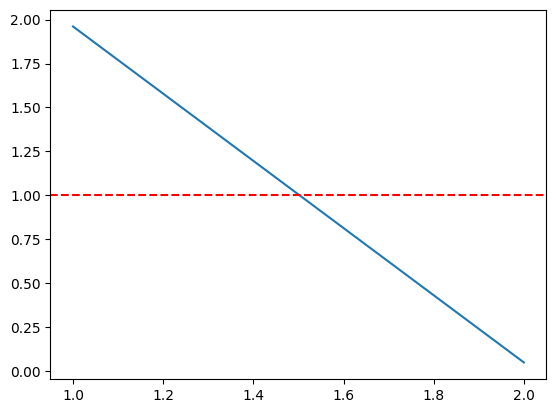

In [26]:
plt.plot(range(1, len(eigen_values)+1), eigen_values)
plt.axhline(y=1, color="r", linestyle="--")

### Elbow Method + Inertia

In [27]:
inertia = []

k_values = range(1,11)

for k in k_values:
    km = KMeans(n_clusters= k, random_state=42, n_init= 10)
    km.fit(x_scaled)
    inertia.append(km.inertia_)

inertia

[398.0,
 99.41837381326295,
 48.403271034812064,
 34.42248726051971,
 24.86865490956258,
 20.10684461543965,
 16.66277116286041,
 14.871302628233508,
 13.308919505470788,
 11.93267830681777]

### Visualization

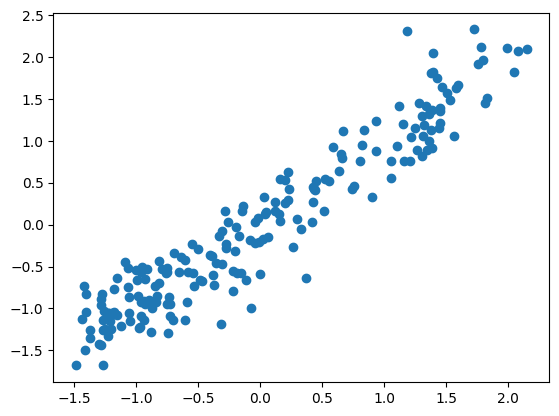

In [28]:
plt.scatter(x_scaled.Area, x_scaled.K_length)

### Clustering the data items

In [29]:
k_model = KMeans(n_clusters= 1, random_state=42)

k_model.fit(x_scaled)



,n_clusters,1
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


### Prediction of clusters

In [30]:
clusters = k_model.predict(x_scaled)

In [31]:
data['Clusters'] = clusters

In [32]:
data.columns

Index(['Area', 'Perimeter', 'Compactness', 'K_length', 'K_width', 'A_coeff',
       'K_groove', 'Clusters'],
      dtype='object')

### Visualization of Observed Clusters

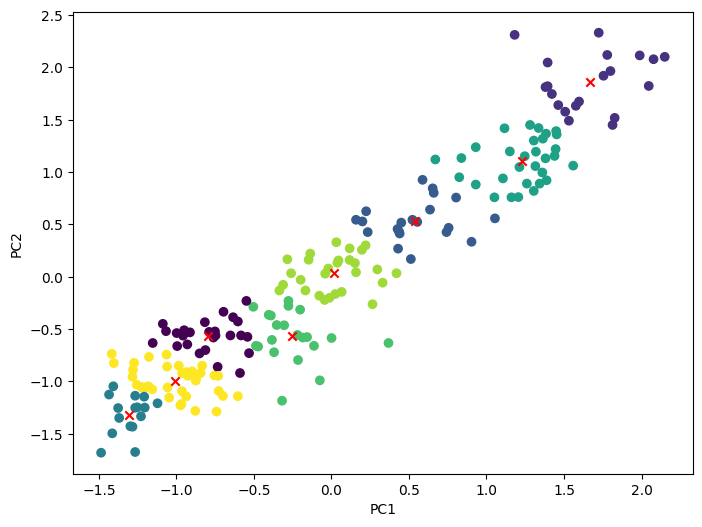

In [33]:
plt.figure(figsize= (8,6))
plt.scatter(x_scaled.Area, x_scaled.K_length, c= k_labels, cmap="viridis")
plt.scatter(k_centers.x, k_centers.y, marker="x", color="red" )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()